Note : Le dataset considéré ici est volumineux et ne peux être stocké dans GITHUB, il faut le récupérer à directement du site web de l'organisateur de la compétition, urls:

https://www.kaggle.com/competitions/ClaimPredictionChallenge/data?select=train_set.zip
https://www.kaggle.com/competitions/ClaimPredictionChallenge/data?select=test_set.zip

et le stocker en local pour pouvoir l'utiliser.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/Actuariat/AllstateDataAnalysis2012Data
%ls -ltr

/content/drive/My Drive/Colab Notebooks/Actuariat/AllstateDataAnalysis2012Data
total 485372
-rw------- 1 root root 116285954 Dec 11  2019 test_set.zip
-rw------- 1 root root 380542114 Dec 11  2019 train_set.zip
-rw------- 1 root root     17697 May 28 20:52 myHistogramAllstate2012.pdf
-rw------- 1 root root    173819 May 28 20:54 myAllstate2012ClaimAmount.pdf


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats
import seaborn as sns
#from scipy.stats import normaltest
#from statsmodels.graphics.gofplots import qqplot
#from copy import deepcopy

import time
%matplotlib inline
sns.set_theme()

In [5]:
import pandas as pd
train_data = pd.read_csv('train_set.zip', low_memory=False)
train_data.head()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Blind_Make,Blind_Model,Blind_Submodel,Cat1,Cat2,...,Var5,Var6,Var7,Var8,NVCat,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
0,1,1,3,2005,2005,K,K.78,K.78.2,D,C,...,1.008912,0.261040,0.907793,-0.077998,M,-0.23153,-0.266117,-0.272337,-0.251419,0.0
1,2,2,2,2005,2003,Q,Q.22,Q.22.3,B,C,...,1.240851,0.432987,-0.726459,0.204785,O,-0.23153,-0.266117,-0.272337,-0.251419,0.0
2,3,3,1,2005,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
3,4,3,1,2006,1998,AR,AR.41,AR.41.1,B,?,...,-0.971487,-1.405797,-0.837048,-1.176858,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0
4,5,3,2,2005,2001,D,D.20,D.20.0,J,C,...,0.812656,2.112691,1.534462,2.347260,F,-0.23153,-0.266117,-0.272337,-0.251419,0.0


In [6]:
train_data.columns

Index(['Row_ID', 'Household_ID', 'Vehicle', 'Calendar_Year', 'Model_Year',
       'Blind_Make', 'Blind_Model', 'Blind_Submodel', 'Cat1', 'Cat2', 'Cat3',
       'Cat4', 'Cat5', 'Cat6', 'Cat7', 'Cat8', 'Cat9', 'Cat10', 'Cat11',
       'Cat12', 'OrdCat', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6',
       'Var7', 'Var8', 'NVCat', 'NVVar1', 'NVVar2', 'NVVar3', 'NVVar4',
       'Claim_Amount'],
      dtype='object')

In [7]:
len(train_data)

13184290

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184290 entries, 0 to 13184289
Data columns (total 35 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Row_ID          int64  
 1   Household_ID    int64  
 2   Vehicle         int64  
 3   Calendar_Year   int64  
 4   Model_Year      int64  
 5   Blind_Make      object 
 6   Blind_Model     object 
 7   Blind_Submodel  object 
 8   Cat1            object 
 9   Cat2            object 
 10  Cat3            object 
 11  Cat4            object 
 12  Cat5            object 
 13  Cat6            object 
 14  Cat7            object 
 15  Cat8            object 
 16  Cat9            object 
 17  Cat10           object 
 18  Cat11           object 
 19  Cat12           object 
 20  OrdCat          object 
 21  Var1            float64
 22  Var2            float64
 23  Var3            float64
 24  Var4            float64
 25  Var5            float64
 26  Var6            float64
 27  Var7            float64
 28  Var8      

In [ ]:
train_data.describe()

,Row_ID,Household_ID,Vehicle,Calendar_Year,Model_Year,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,NVVar1,NVVar2,NVVar3,NVVar4,Claim_Amount
count,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07,1.318429e+07
mean,6.592146e+06,4.128242e+06,1.894002e+00,2.006052e+03,1.999312e+03,-1.011925e-02,-6.508702e-02,-2.543391e-02,-5.456792e-02,3.838594e-03,-4.012271e-02,-2.421288e-02,-5.856059e-02,1.468410e-02,1.751169e-02,1.354226e-02,1.851376e-02,1.360658e+00
std,3.805977e+06,2.248415e+06,1.173861e+00,8.123720e-01,5.211866e+00,9.800609e-01,9.684165e-01,1.018902e+00,9.680170e-01,9.910490e-01,9.792078e-01,1.006433e+00,1.003954e+00,1.031040e+00,1.038212e+00,1.027748e+00,1.034274e+00,3.900103e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,2.005000e+03,1.981000e+03,-2.578222e+00,-2.493393e+00,-2.790335e+00,-2.508216e+00,-3.350344e+00,-2.376657e+00,-2.778491e+00,-2.163042e+00,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
25%,3.296073e+06,2.184932e+06,1.000000e+00,2.005000e+03,1.996000e+03,-6.658971e-01,-8.161519e-01,-8.696874e-01,-7.830189e-01,-6.860239e-01,-6.887650e-01,-8.984857e-01,-6.517680e-01,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
50%,6.592146e+06,4.257083e+06,2.000000e+00,2.006000e+03,2.000000e+03,-3.123581e-01,-1.245062e-01,-2.217581e-01,-1.064709e-01,-1.150981e-01,-2.372568e-01,-4.684193e-01,-2.568567e-01,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
75%,9.888218e+06,6.281433e+06,2.000000e+00,2.007000e+03,2.003000e+03,4.429298e-01,4.806838e-01,7.269956e-01,4.855086e-01,5.331405e-01,4.973212e-01,8.217801e-01,3.409799e-01,-2.315299e-01,-2.661168e-01,-2.723372e-01,-2.514189e-01,0.000000e+00
max,1.318429e+07,7.542113e+06,2.900000e+01,2.007000e+03,2.009000e+03,5.143392e+00,7.829420e+00,5.563325e+00,7.589263e+00,4.018167e+00,4.584289e+00,4.127148e+00,4.735074e+01,6.627110e+00,8.883081e+00,8.691144e+00,6.388802e+00,1.144075e+04


## Analyse de la variable cible (Target variable)

In [ ]:
100*len(train_data[train_data['Claim_Amount']>0]) / len(train_data)

0.7251433334673312

## Remarque:
Uniquement `0.73%` des montants de sinistres sont strictement supérieurs à zéros.

In [ ]:
100*len(train_data[train_data['Claim_Amount']==0]) / len(train_data)

99.27485666653267

## Remarque:
`99.3%` des montants de sinistres sont égales à zéros.

In [ ]:
a = train_data['Claim_Amount'].skew()
print('Skewness of Claim_Amount feature is :', a)

Skewness of loss feature is : 70.72036466134124


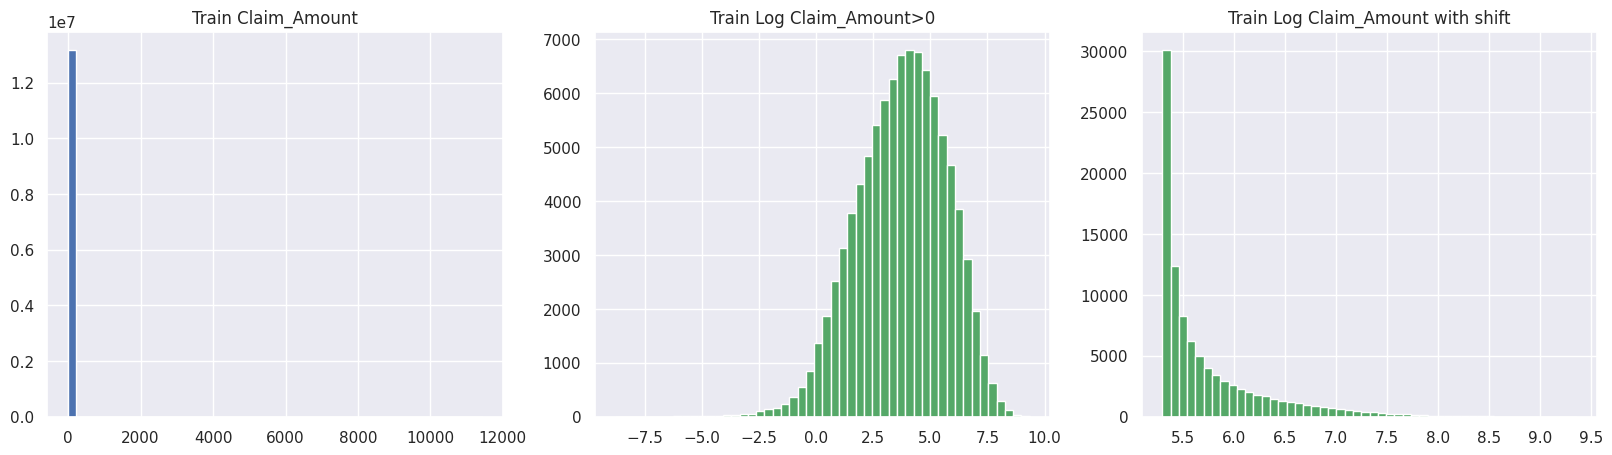

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(20, 5)

ax1.hist(train_data['Claim_Amount'], bins=50)
ax1.set_title('Train Claim_Amount')

ax2.hist(np.log(train_data[train_data['Claim_Amount']>0]['Claim_Amount']), bins=50, color='g')
ax2.set_title('Train Log Claim_Amount>0')

ax3.hist(np.log(train_data[train_data['Claim_Amount']>0]['Claim_Amount']+200), bins=50, color='g')
ax3.set_title('Train Log Claim_Amount with shift')
plt.savefig('./myHistogramAllstate2012.pdf')
plt.show();

In [ ]:
train_data_greater_zeros = train_data[train_data['Claim_Amount']>0]

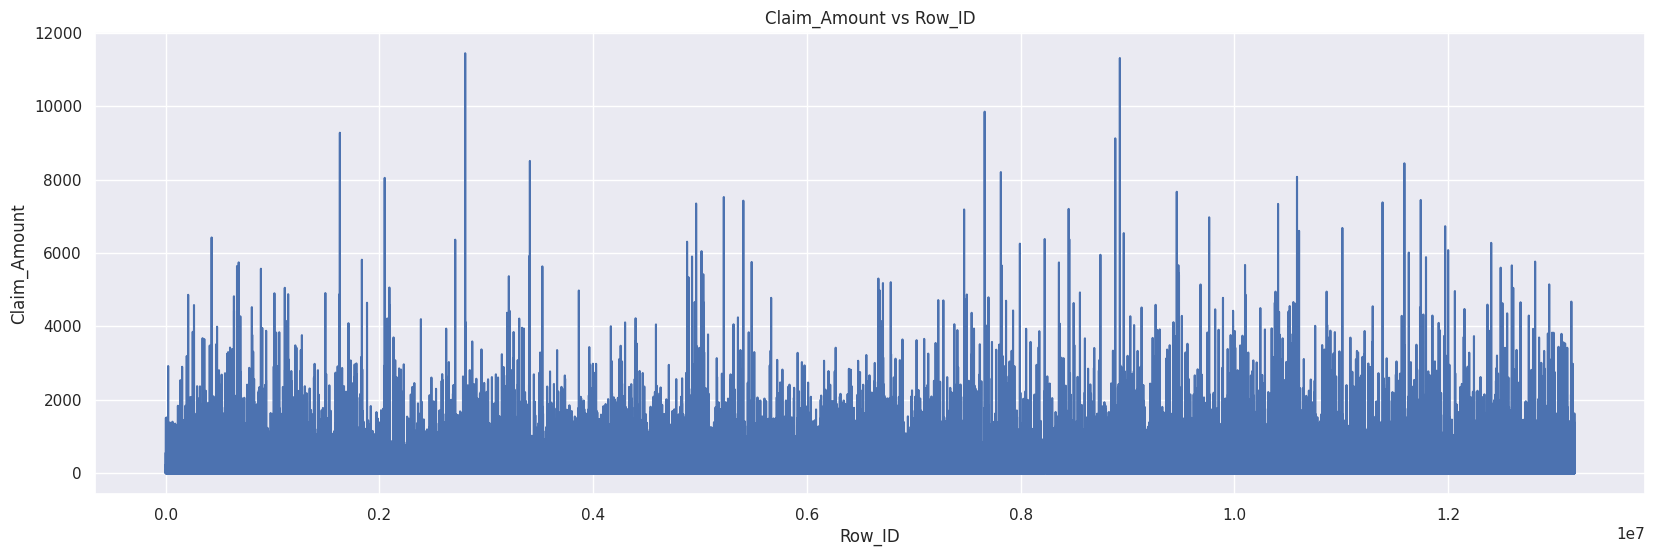

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(train_data['Row_ID'],train_data['Claim_Amount'])
plt.xlabel('Row_ID')
plt.ylabel('Claim_Amount')
plt.title('Claim_Amount vs Row_ID')
plt.savefig('./myAllstate2012ClaimAmount.pdf')
plt.show()

## Remarque:
* Nous pouvons remarquer qu'il y a plusieurs pics dans le graphe de la caractéristique de perte, ce qui représente une perte énorme à un moment donné.
* Comme nous remarquons de nombreux pics, nous pouvons dire que les données réelles de cette caractéristique sont biaisées (skewed), ce qui peut entraîner une performance sous-optimale des modèles de régression que nous construisons.
* Les données asymétriques (désiquilibrés) ont une incidence considérable sur vos performances.

## Calculate skewness and see how we can reduce skewness.

In [ ]:
a = train_data['Claim_Amount'].skew()
print('Skewness of Claim_Amount feature is :',a)

Skewness of Claim_Amount feature is : 70.72036466134124


In [ ]:
train_data['logloss'] = np.log(train_data[train_data['Claim_Amount']>0]['Claim_Amount'])
print('Skewness of Claim_Amount feature after applying log function :', train_data['logloss'].skew())
train_data = train_data.drop(['logloss'],axis = 1)

Skewness of Claim_Amount feature after applying log function : -0.3856457407474764


## Observation:
* we can see that there is a lot of skewness in the target variable and this will result in wrong predictions.
* we applied log transformation over that target variable and noticed that skewness has decreased a lot.

## Plots for target variable before and after log transformation

## Box plot of target variable

Text(0.5, 1.0, 'Zoomed version of loss feature')

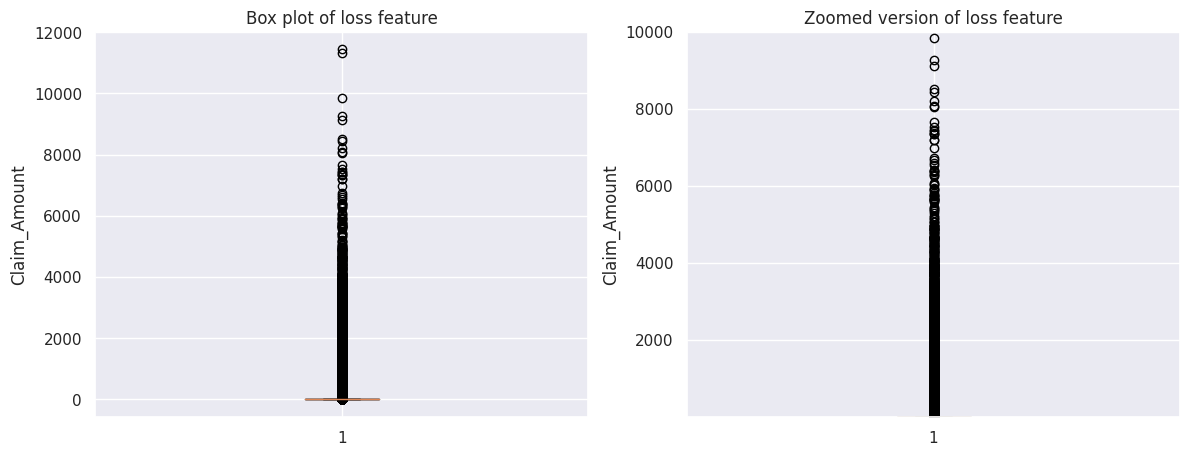

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)

fig.set_size_inches(14,5)
ax1.boxplot(train_data['Claim_Amount'])
ax1.set_ylabel('Claim_Amount')
ax1.set_title('Box plot of loss feature')


#values = uniq_values_in_categories[uniq_values_in_categories.unique_values <= 25].unique_values
ax2.set_ylim(1,10000)
ax2.boxplot(train_data['Claim_Amount'])
ax2.set_ylabel('Claim_Amount')
ax2.set_title('Zoomed version of loss feature')

## Remarque:
* Nous pouvons immédiatement remarquer que la plupart des valeurs des 25, 50 et 75e percentiles sont très faibles. Il y a quelques points où la perte est très élevée, habituellement nous les traitons comme des valeurs aberrantes, mais dans ce cas nous devons les traiter car l'entreprise a subi une perte énorme à ce moment-là.